In [ ]:
# twi!pip install -U ultralytics==8.3.0 sahi
# import ultralytics
# ultralytics.checks()

!pip install -U ultralytics==8.3.0
!pip install sahi
import ultralytics
ultralytics.checks()

!pip install inference supervision jupyter_compare_view

Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.0/107.7 GB disk)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import supervision as sv
from inference import get_model

In [ ]:
# Install SAHI somehow, if it's not already in ultralytics
import sahi

In [ ]:
# Bring that VOS_RGB.png into colab

In [ ]:
# https://docs.ultralytics.com/models/fast-sam/#predict-usage
# https://docs.ultralytics.com/guides/sahi-tiled-inference
# https://github.com/obss/sahi
# https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov8.ipynb <-------
# Google FastSAM & SAHI

# Everything you need to know about results
# https://docs.ultralytics.com/reference/engine/results/


# VOS
# https://github.com/ganeshkumar321/TagLab_ganesh/blob/main/sampleProjects/data/VOS_RGB.png

In [ ]:
# Define an inference source
source = "VOS_RGB.png"

from ultralytics.models.fastsam import FastSAMPredictor

# Create FastSAMPredictor
overrides = dict(conf=0.25, task="segment", mode="predict", model="FastSAM-s.pt", save=False, imgsz=1024) # detect
predictor = FastSAMPredictor(overrides=overrides)

# Segment everything
everything_results = predictor(source)

# Prompt inference
# bbox_results = predictor.prompt(everything_results, bboxes=[[200, 200, 300, 300]])
# point_results = predictor.prompt(everything_results, points=[200, 200])
# text_results = predictor.prompt(everything_results, text="a dog") # <----


Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)


100%|██████████| 22.7M/22.7M [00:00<00:00, 240MB/s]


YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs
image 1/1 /content/VOS_RGB.png: 1024x1024 300 objects, 2562.6ms
Speed: 29.1ms preprocess, 2562.6ms inference, 7057.9ms postprocess per image at shape (1, 3, 1024, 1024)


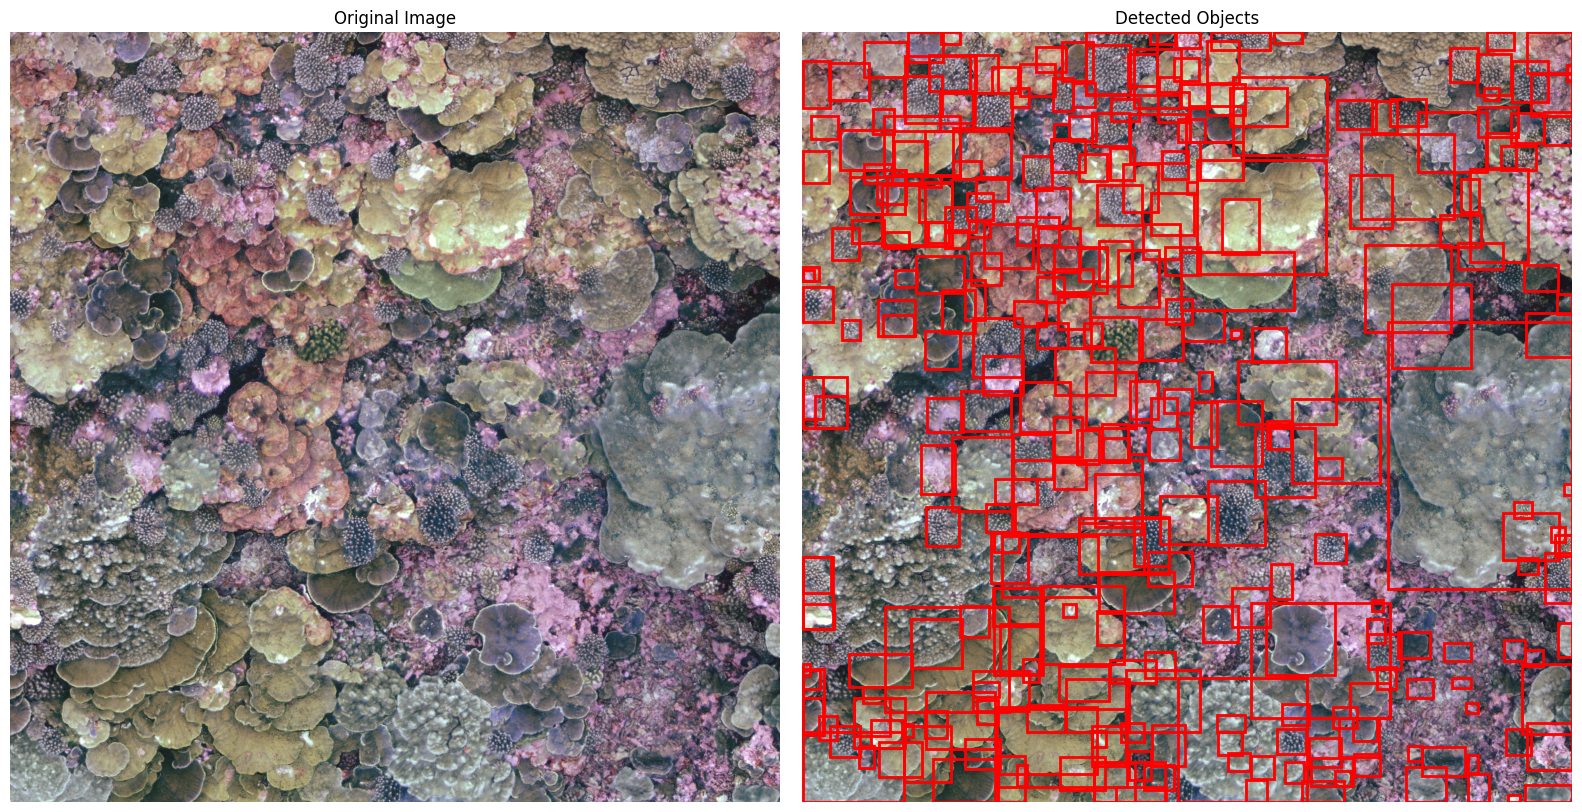

In [ ]:
# Write the code to be able to display the results
import matplotlib.pyplot as plt
import cv2

def visualize_fastsam_boxes(source, everything_results):

    # Read the image using OpenCV and convert to RBG format
    img = cv2.imread(source)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #Plotting the image
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'Detected Objects')
    plt.imshow(img)

    #Iterate through all detected bounding boxes in the results
    for result in everything_results[0].boxes:

        #Get the coordinates of the bounding box and convert to integer
        box = result.xyxy[0].cpu().numpy().astype(int)

        #Add a red rectangle around the detected object
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                                           fill=False, edgecolor='red', linewidth=2))

    plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_fastsam_boxes(source, everything_results)

In [ ]:
from sahi.utils.file import download_from_url
from sahi.utils.ultralytics import download_yolov8n_model  # <----

In [ ]:
# Download YOLO11 model
model_path = "models/yolo8n.pt"
download_yolov8n_model(model_path)

from sahi import AutoDetectionModel

# Initialize a detection model using the YOLOv8 weights
detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov8",
    model_path=model_path,
    confidence_threshold=0.01,
    device="cpu",  # or 'cuda:0'
)

from sahi.predict import get_prediction

# Do a prediction on the input image using the detection model
result = get_prediction("VOS_RGB.png", detection_model)
result.export_visuals("result")  # See "prediction_visual.png"

yolo8n.pt: 100%|██████████| 6.25M/6.25M [00:00<00:00, 154MB/s]


In [ ]:
# Run SAHI w/ FastSAM on the same image here...
# Example code from SAHI YOLOv8 colab:
from sahi.predict import get_sliced_prediction

result = get_sliced_prediction(
    "VOS_RGB.png",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 256 slices.


In [ ]:
# Write the code to be able to display the results of that...
result.export_visuals(export_dir="sahi_results")
